In [12]:
import os

visualization_dir = 'visualization/'
os.makedirs(visualization_dir, exist_ok=True)

import numpy as np
from level_set import LevelSet

# 测试参数
nelx, nely, domain = 32, 20, [0, 32, 0, 20]

# 创建 LevelSet 实例
ls = LevelSet(nelx, nely, domain)

In [13]:
# 创建一个测试用的结构数组（含有一个孔洞）
struc = np.ones((nely, nelx))
struc[8:12, 13:19] = 0
strucFull = np.zeros((nely + 2, nelx + 2))
strucFull[1:-1, 1:-1] = struc
print("strucFull:", strucFull.shape, "\n", strucFull)

# 调用 reinit 函数
lsf = ls.reinit(struc)
print("lsf:", lsf.shape, "\n", lsf)

strucFull: (22, 34) 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1

In [14]:
# 可视化
from fealpy.mesh import UniformMesh2d
hx = (domain[1] - domain[0]) / nelx
hy = (domain[3] - domain[2]) / nely
mesh = UniformMesh2d(extent=(0, nelx+2, 0, nely+2), 
                    h=(hx, hy), origin=(domain[0], domain[2]))

fname = os.path.join(visualization_dir, 'strucFull_hole.vtu')
mesh.to_vtk_file(filename=fname, 
                celldata={'strucFull': strucFull.flatten('C')})

fname = os.path.join(visualization_dir, 'lsf_hole.vtu')
mesh.to_vtk_file(filename=fname,
                 celldata={'lsf': lsf.flatten('C')})

'visualization/lsf_hole.vtu'

为什么 UniformMesh2d 中单元和节点都是从左往右？
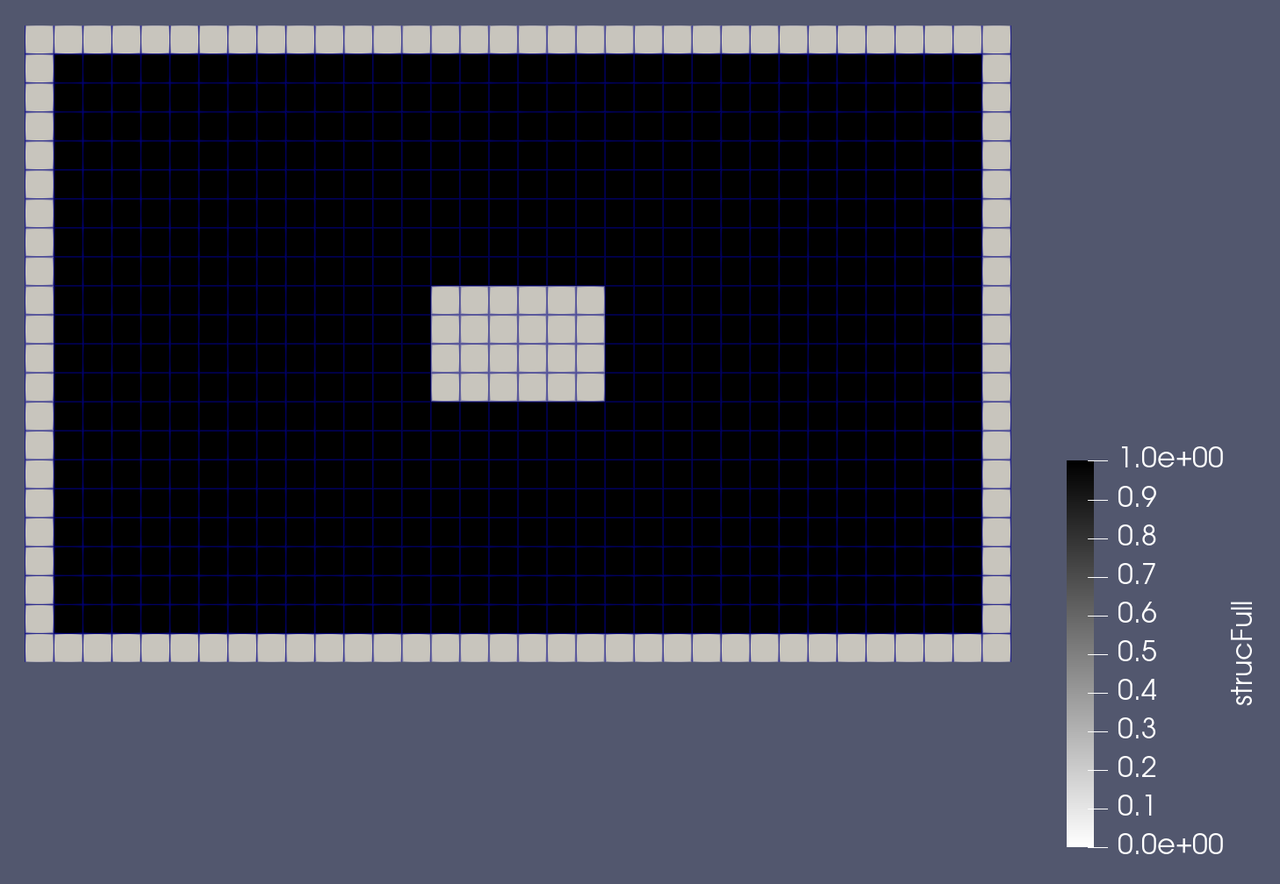

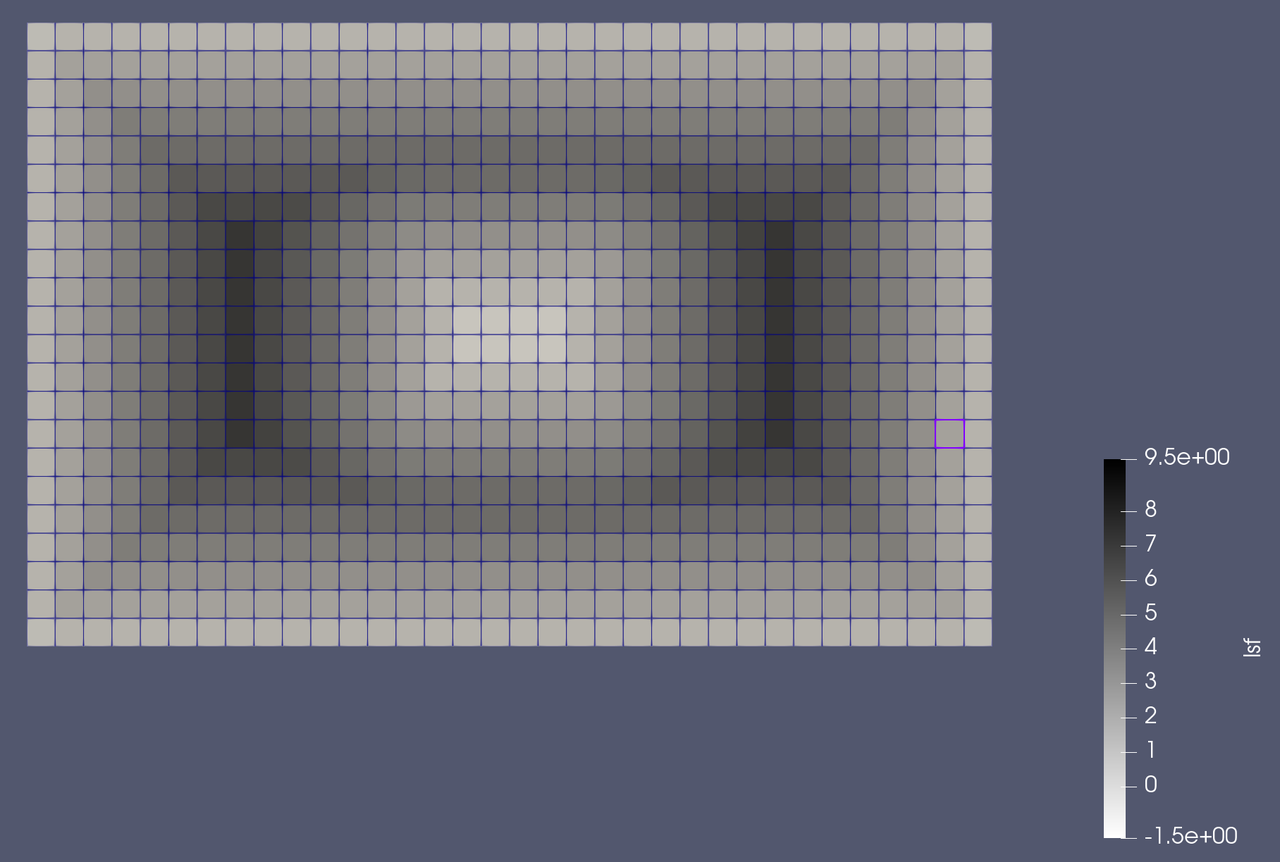

In [15]:
# 创建一个测试用的结构数组（全实体）
struc = np.ones((nely, nelx))
strucFull = np.zeros((nely + 2, nelx + 2))
strucFull[1:-1, 1:-1] = struc
print("strucFull:", strucFull.shape, "\n", strucFull)

# 调用 reinit 函数
lsf = ls.reinit(struc)
print("lsf:", lsf.shape, "\n", lsf)

strucFull: (22, 34) 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1

In [16]:
# 可视化
from fealpy.mesh import UniformMesh2d
hx = (domain[1] - domain[0]) / nelx
hy = (domain[3] - domain[2]) / nely
mesh = UniformMesh2d(extent=(0, nelx+2, 0, nely+2), 
                    h=(hx, hy), origin=(domain[0], domain[2]))

fname = os.path.join(visualization_dir, 'strucFull_full.vtu')
mesh.to_vtk_file(filename=fname, 
                 celldata={'strucFull': strucFull.flatten('C')})

fname = os.path.join(visualization_dir, 'lsf_full.vtu')
mesh.to_vtk_file(filename=fname, 
                 celldata={'lsf': lsf.flatten('C')})

'visualization/lsf_full.vtu'

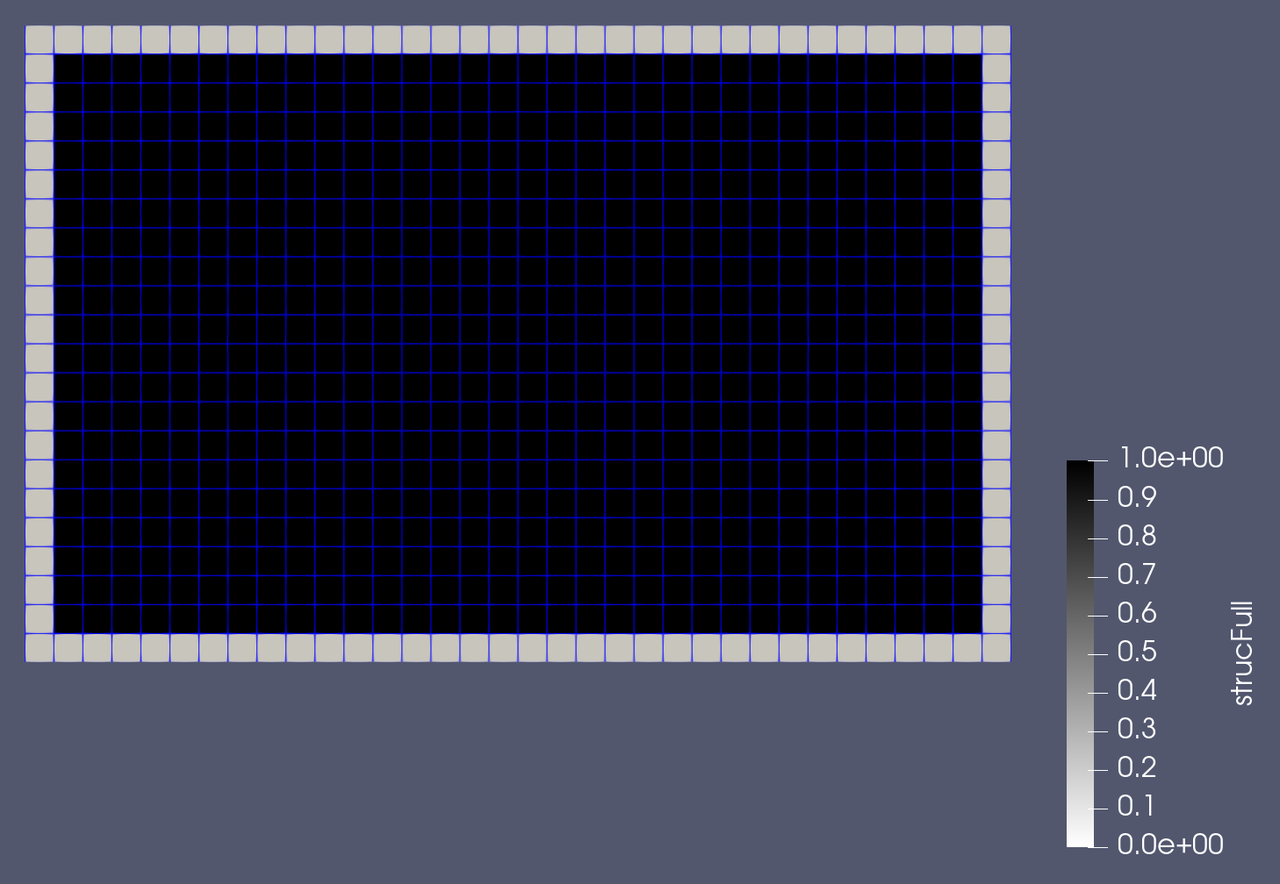

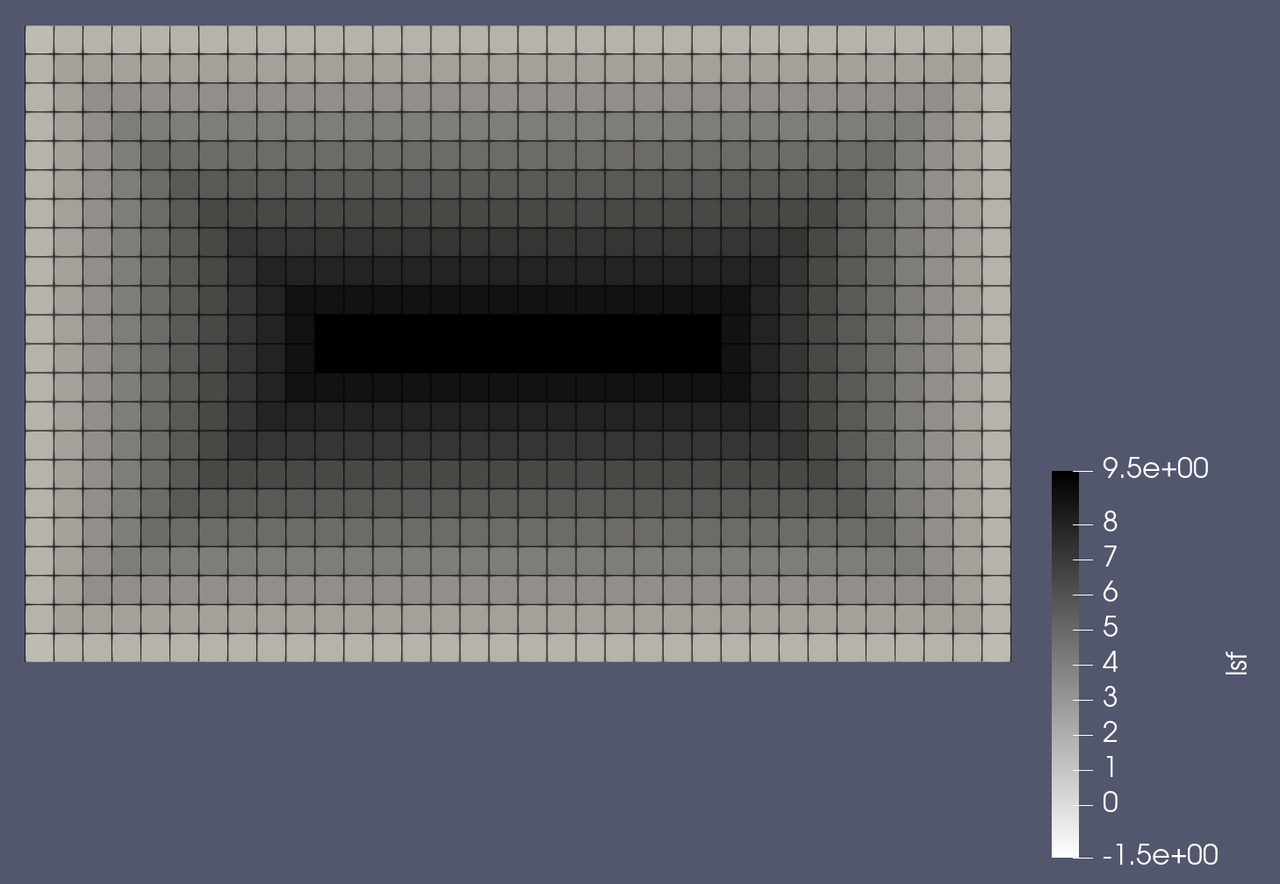